In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("./data/synthetic_greenhouse_data.csv")
print("Data loaded.")
print(df.head())

Data loaded.
                     datetime  next_internal_temp  next_internal_hum  \
0  2025-07-12 01:10:24.721558           82.654585          74.623144   
1  2025-07-12 01:10:24.721558           42.161584          72.400116   
2  2025-07-12 01:10:24.721558           46.861082          71.900116   
3  2025-07-12 01:10:24.721558           48.971227          71.400116   
4  2025-07-12 01:10:24.721558           53.748413          70.900116   

   external_temp  internal_temp  external_humidity  internal_humidity  \
0      84.313560      77.328401          87.973196          68.901693   
1      29.549010      82.654585          67.213052          74.623144   
2     107.651543      42.161584          74.910098          72.400116   
3      60.563969      46.861082          51.643272          71.900116   
4     116.014946      48.971227          81.492902          71.400116   

   heating  venting  
0        0        1  
1        0        1  
2        1        0  
3        1        0  
4    

In [77]:
features = ["external_temp", "external_humidity", "internal_temp", "internal_humidity", "heating", "venting"]

y_reg = df["next_internal_temp"]

y_clf_heat = df["heating"]
y_clf_vent = df["venting"]

X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    df[features], y_reg, test_size=0.2, random_state=42
)

_, _, y_clf_heat_train, y_clf_heat_test = train_test_split(
    df[features], y_clf_heat, test_size=0.2, random_state=42
)

_, _, y_clf_vent_train, y_clf_vent_test = train_test_split(
    df[features], y_clf_vent, test_size=0.2, random_state=42
)

In [78]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
reg_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Training regression model...")
history_reg = reg_model.fit(
    X_train_scaled, y_reg_train,
    epochs=60, validation_split=0.2, verbose=1
)

Training regression model...
Epoch 1/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4627.4375 - mae: 65.7070 - val_loss: 4390.3877 - val_mae: 63.8128
Epoch 2/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4562.8291 - mae: 65.3254 - val_loss: 4344.1729 - val_mae: 63.4630
Epoch 3/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4704.9893 - mae: 65.9803 - val_loss: 4291.0752 - val_mae: 63.0608
Epoch 4/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4374.9663 - mae: 64.2558 - val_loss: 4227.7227 - val_mae: 62.5819
Epoch 5/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4556.3101 - mae: 65.2427 - val_loss: 4149.0229 - val_mae: 61.9869
Epoch 6/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4615.7695 - mae: 65.4975 - val_loss: 4054.0422 - val_mae: 61.2609
Epoch 7/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4275.9043 - mae: 63.1432 - val_loss: 3940.4204 - val_mae: 60.3819
Epoch 8/60
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4143.3579 - mae: 62.0200 - val_loss: 3804.73

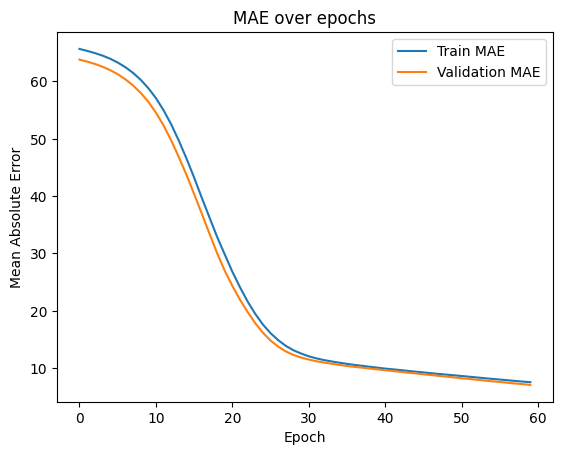

In [80]:
plt.plot(history_reg.history['mae'], label='Train MAE')
plt.plot(history_reg.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('MAE over epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()

In [81]:
clf_heat_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_heat_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training classifier model...")
history_clf_heat = clf_heat_model.fit(
    X_train_scaled, y_clf_heat_train,
    epochs=30, validation_split=0.2, verbose=1
)

Training classifier model...
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8252 - loss: 0.5561 - val_accuracy: 0.8938 - val_loss: 0.4925
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8971 - loss: 0.4692 - val_accuracy: 0.9312 - val_loss: 0.4153
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9540 - loss: 0.3881 - val_accuracy: 0.9438 - val_loss: 0.3443
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9693 - loss: 0.3224 - val_accuracy: 0.9625 - val_loss: 0.2796
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9782 - loss: 0.2677 - val_accuracy: 0.9750 - val_loss: 0.2221
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9906 - loss: 0.2081 - val_accuracy: 0.9812 - val_loss: 0.1726
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9895 - loss: 0.1580 - val_accuracy: 0.9812 - val_loss: 0.1326
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9974 - loss: 0.1231 -

In [82]:
clf_vent_model = tf.keras.Sequential([
    tf.keras.Input(shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

clf_vent_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training classifier model...")
history_clf_vent = clf_vent_model.fit(
    X_train_scaled, y_clf_vent_train,
    epochs=30, validation_split=0.2, verbose=1
)

Training classifier model...
Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3869 - loss: 0.7541 - val_accuracy: 0.5500 - val_loss: 0.6673
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6114 - loss: 0.6473 - val_accuracy: 0.8062 - val_loss: 0.5702
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8286 - loss: 0.5591 - val_accuracy: 0.8687 - val_loss: 0.4894
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8903 - loss: 0.4755 - val_accuracy: 0.9125 - val_loss: 0.4192
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9134 - loss: 0.4082 - val_accuracy: 0.9250 - val_loss: 0.3538
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9343 - loss: 0.3514 - val_accuracy: 0.9625 - val_loss: 0.2892
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9686 - loss: 0.2804 - val_accuracy: 0.9750 - val_loss: 0.2290
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9885 - loss: 0.2201 - v

In [83]:
print("\n✅ Regression model evaluation:")
reg_eval = reg_model.evaluate(X_test_scaled, y_reg_test, verbose=0)
print(f"Test MAE: {reg_eval[1]:.2f}")

print("\n✅ Classifier model evaluation:")
clf_heat_eval = clf_heat_model.evaluate(X_test_scaled, y_clf_heat_test, verbose=0)
print(f"Test accuracy: {clf_heat_eval[1]*100:.1f}%")

print("\n✅ Classifier model evaluation:")
clf_vent_eval = clf_vent_model.evaluate(X_test_scaled, y_clf_vent_test, verbose=0)
print(f"Test accuracy: {clf_vent_eval[1]*100:.1f}%")


✅ Regression model evaluation:
Test MAE: 7.30

✅ Classifier model evaluation:
Test accuracy: 100.0%

✅ Classifier model evaluation:
Test accuracy: 100.0%


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


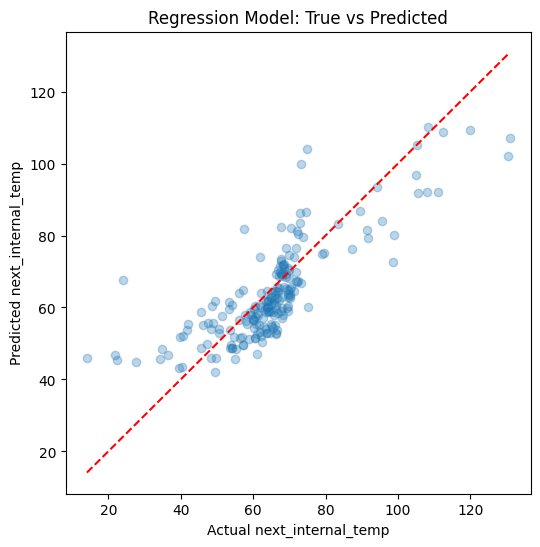

In [84]:
y_pred_reg = reg_model.predict(X_test_scaled).flatten()
plt.figure(figsize=(6,6))
plt.scatter(y_reg_test, y_pred_reg, alpha=0.3)
plt.xlabel("Actual next_internal_temp")
plt.ylabel("Predicted next_internal_temp")
plt.title("Regression Model: True vs Predicted")
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


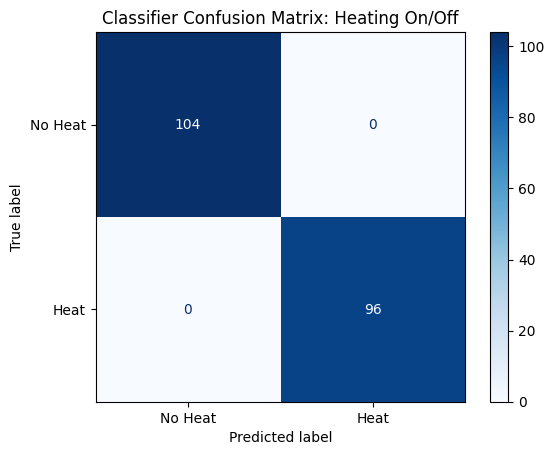

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_clf_heat_probs = clf_heat_model.predict(X_test_scaled)
y_pred_clf_heat = (y_pred_clf_heat_probs > 0.5).astype(int)
cm_heat = confusion_matrix(y_clf_heat_test, y_pred_clf_heat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_heat, display_labels=["No Heat","Heat"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Classifier Confusion Matrix: Heating On/Off")
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


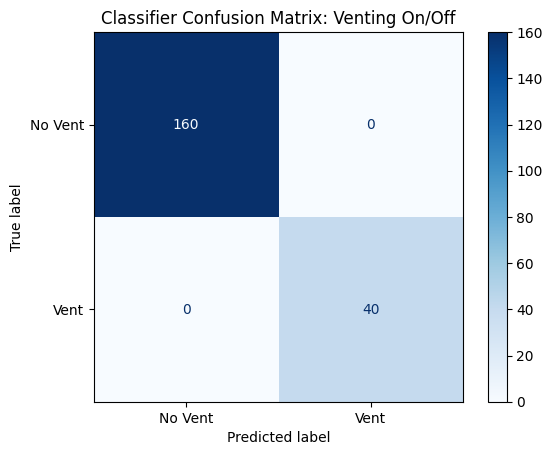

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict for venting
vent_preds_probs = clf_vent_model.predict(X_test_scaled)
vent_preds = (vent_preds_probs > 0.5).astype(int)

# Compute confusion matrix
cm_vent = confusion_matrix(y_clf_vent_test, vent_preds, labels=[0,1])

# Display
disp_vent = ConfusionMatrixDisplay(confusion_matrix=cm_vent, display_labels=["No Vent","Vent"])
disp_vent.plot(cmap=plt.cm.Blues)
plt.title("Classifier Confusion Matrix: Venting On/Off")
plt.show()

In [89]:
reg_model.save("./models/regression_model.keras")
clf_heat_model.save("./models/classifier_heat_model.keras")
clf_vent_model.save("./models/classifier_vent_model.keras")

print("\n✅ Models saved to ./models/")


✅ Models saved to ./models/
